#Hackathon - Second Quantum Computing School

##Group: QNat

Alberto Bezerra de Palhares Junior   
Joab Morais Varela  
Moisés da Rocha Alves  
Paulo Vitor de Queiroz Ferreira  
Tailan Santos Sarubi  

#Introduction to Applications of Quantum Computing to Quantum Chemistry

##Exercise: 1


#Task:
Considering the following Hamiltonian
$$K = \frac{1}{3}\sum_{i<j} X_i X_j - \sum_{i=0}^{n-1} Z_i ,$$

where $X_i$ and $Z_i$ are respectively Pauli gate X and Z applied to the i-th qubit in the quantum circuit. Implement in Pennylane a function that simulates a quantum circuit where the qubits start in the state $|0\rangle$ and a Hadamard gate $H$ is applied to all of them, producing a final state $|\psi \rangle$.

##Step 0:
Firstly, we need to download and import the libraries we are going to use.

In [ ]:
!pip install pennylane -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.8 MB/s eta 0:00:00


In [ ]:
#Author: Joab Morais Varela

import pennylane as qml
from pennylane import numpy as pnp

import matplotlib.pyplot as plt

##Step 1:
Creating a function that implements the hamiltonian $K$.

In [ ]:
# Function which returns the Hamiltonian
def hamiltonian(num_qubits):
    obs = []
    coeffs = []

    # Checking if i<j and creating obs and coeffs for the first term of the Hamiltonian
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i <j:
                coeffs.append(1/3)
                obs.append(qml.PauliX(i) @ qml.PauliX(j))


    # Creating obs and coeffs for the second Hamiltonian term (This could be done together witht the first term during the last loop, but we think it is better visualized separately)
    for i in range(num_qubits):
        coeffs.append(-1)
        obs.append(qml.PauliZ(i))

    return qml.Hamiltonian(coeffs, obs)

Testing our Hamiltonian function:

In [ ]:
#============ Inform the number of qubits here ============#
num_qubits = 10
#============ Inform the number of qubits here ============#
print("H = ")
for i in hamiltonian(num_qubits):
  print(i)

H = 
0.3333333333333333 * (X(0) @ X(1))
0.3333333333333333 * (X(0) @ X(2))
0.3333333333333333 * (X(0) @ X(3))
0.3333333333333333 * (X(0) @ X(4))
0.3333333333333333 * (X(0) @ X(5))
0.3333333333333333 * (X(0) @ X(6))
0.3333333333333333 * (X(0) @ X(7))
0.3333333333333333 * (X(0) @ X(8))
0.3333333333333333 * (X(0) @ X(9))
0.3333333333333333 * (X(1) @ X(2))
0.3333333333333333 * (X(1) @ X(3))
0.3333333333333333 * (X(1) @ X(4))
0.3333333333333333 * (X(1) @ X(5))
0.3333333333333333 * (X(1) @ X(6))
0.3333333333333333 * (X(1) @ X(7))
0.3333333333333333 * (X(1) @ X(8))
0.3333333333333333 * (X(1) @ X(9))
0.3333333333333333 * (X(2) @ X(3))
0.3333333333333333 * (X(2) @ X(4))
0.3333333333333333 * (X(2) @ X(5))
0.3333333333333333 * (X(2) @ X(6))
0.3333333333333333 * (X(2) @ X(7))
0.3333333333333333 * (X(2) @ X(8))
0.3333333333333333 * (X(2) @ X(9))
0.3333333333333333 * (X(3) @ X(4))
0.3333333333333333 * (X(3) @ X(5))
0.3333333333333333 * (X(3) @ X(6))
0.3333333333333333 * (X(3) @ X(7))
0.3333333333333

##Step 2:
Now we gonna make a fuction that initiate the state and return the expectation value of the Hamiltonian with the state.

In [ ]:
dev = qml.device('default.qubit',wires=num_qubits)

@qml.qnode(dev)
def circuit(num_qubits):

    # Creating the Initial state H^n |0>^n
    for i in range(num_qubits):
        qml.Hadamard(wires=i)

    # Creating the Hamiltonian using the fucntion 'hamiltonian'
    H = hamiltonian(num_qubits)

    return qml.expval(H)

exp_val_circ = circuit(num_qubits)
print("The expecation value of the exercise's Hamiltonian computed by Pennylane: ", exp_val_circ)

The expecation value of the exercise's Hamiltonian computed by Pennylane:  14.999999999999982


Now we are going to compute the Hamiltonian's expectation value by hand to check if it is the same value.

In [ ]:
# First we need the state vector

@qml.qnode(dev)
def get_sv(num_qubits):

    # Creating the Initial state H^n |0>^n
    for i in range(num_qubits):
        qml.Hadamard(wires=i)

    return qml.state()

sv = pnp.array(get_sv(num_qubits)).reshape(2**num_qubits,1)

# Now, we need its dual
dual = pnp.conj(sv).T

# And finally the observable to compute the expectation value, here we use our "hamiltonian" function
op = qml.matrix(hamiltonian(num_qubits))

exp_val_hand = pnp.matmul(dual, pnp.matmul(op, sv))[0][0]

print("The expectation value of the exercises's Hamiltonian computed by hand: ", exp_val_hand)

print("The relative error between the two Hamiltonian values: ", (exp_val_hand - exp_val_circ)/exp_val_hand)

The expectation value of the exercises's Hamiltonian computed by hand:  (14.999999999999996+0j)
The relative error between the two Hamiltonian values:  (9.473903143468004e-16+0j)


##Step 3 (Extra step):

Ploting the expectation value by number of qubits:

Text(0, 0.5, 'Expectation Value')

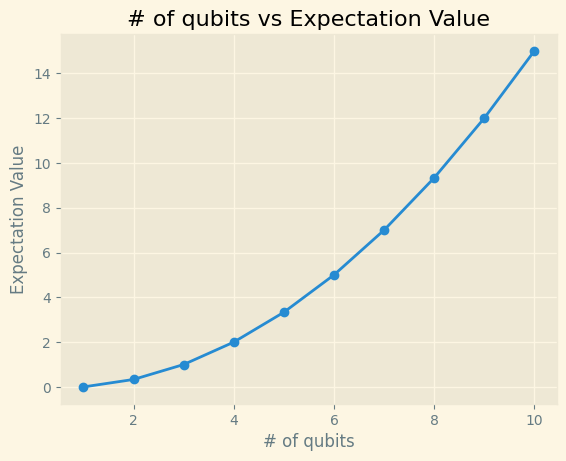

In [ ]:
num_of_qubits_list = [i+1 for i in range(10)] #A list of numbers(representing the number of qubits) goint from 1 to 10
exp_val_list = [circuit(i) for i in num_of_qubits_list] #A list of expectation values for diferent qubits quantities

plt.plot(num_of_qubits_list, exp_val_list,'o-')
plt.style.use('Solarize_Light2')
plt.title("# of qubits vs Expectation Value")
plt.xlabel('# of qubits')
plt.ylabel('Expectation Value')